# Learning to use spaCy

In [1]:
import spacy
from spacy import displacy
import pprint

##### 1. Part-of-Speech (POS) Tagging using spaCy
 Part-of-speech (POS) tagging, also called grammatical tagging, is the automatic assignment of part-of-speech tags to words in a sentence [9,10,11]. A POS is a grammatical classification that commonly includes verbs, adjectives, adverbs, nouns, etc. POS tagging is an important natural language processing application used in machine translation, word sense disambiguation, question answering parsing, and so on. The genesis of POS tagging is based on the ambiguity of many words in terms of their part of speech in a context.
 
 Source : https://journalofbigdata.springeropen.com/articles/10.1186/s40537-022-00561-y#:~:text=Part%2Dof%2Dspeech%20(POS)%20tagging%2C%20also%20called,%2C%20adverbs%2C%20nouns%2C%20etc.
 
 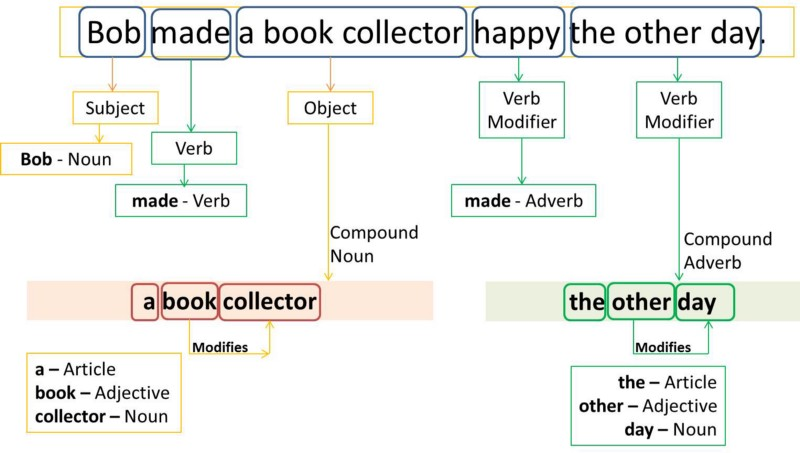
 
 Source : https://www.freecodecamp.org/news/an-introduction-to-part-of-speech-tagging-and-the-hidden-markov-model-953d45338f24/
 

In [2]:
nlp = spacy.load('en_core_web_sm')
text = "I love books. I want to book a ticket to the movie theater to make love."
# Sentence chosen coz it has book and love in two different ways and its the only thing that could come to my mind(smh)
tokens = nlp(text)
post = []
for i in tokens:
    print(i,"\t-\t",i.pos_)

I 	-	 PRON
love 	-	 VERB
books 	-	 NOUN
. 	-	 PUNCT
I 	-	 PRON
want 	-	 VERB
to 	-	 PART
book 	-	 VERB
a 	-	 DET
ticket 	-	 NOUN
to 	-	 ADP
the 	-	 DET
movie 	-	 NOUN
theater 	-	 NOUN
to 	-	 PART
make 	-	 VERB
love 	-	 NOUN
. 	-	 PUNCT


##### 2. Dependency Parsing using spaCy
Every sentence has a grammatical structure to it and with the help of dependency parsing, we can extract this structure. It can also be thought of as a directed graph, where nodes correspond to the words in the sentence and the edges between the nodes are the corresponding dependencies between the word.

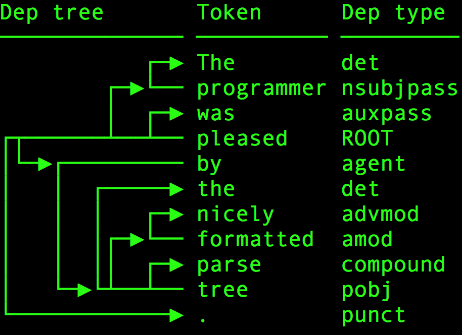

Source : https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

In [3]:
print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in tokens:
        print ("{:<15} | {:<8} | {:<15} | {:<20}".format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
 # Use displayCy to visualize the dependency 
displacy.render(tokens, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
I               | nsubj    | love            | []                  
love            | ROOT     | love            | [I, books, .]       
books           | dobj     | love            | []                  
.               | punct    | love            | []                  
I               | nsubj    | want            | []                  
want            | ROOT     | want            | [I, book, .]        
to              | aux      | book            | []                  
book            | xcomp    | want            | [to, ticket, make]  
a               | det      | ticket          | []                  
ticket          | dobj     | book            | [a, to]             
to              | prep     | ticket          | [theater]           
the             | det      | theater         | []                  
movie           | compound | theater         

##### 3. Named Entity Recognition using spaCy

The named entity recognition (NER) is one of the most popular data preprocessing task. It involves the identification of key information in the text and classification into a set of predefined categories. An entity is basically the thing that is consistently talked about or refer to in the text.

Source: https://www.geeksforgeeks.org/named-entity-recognition/

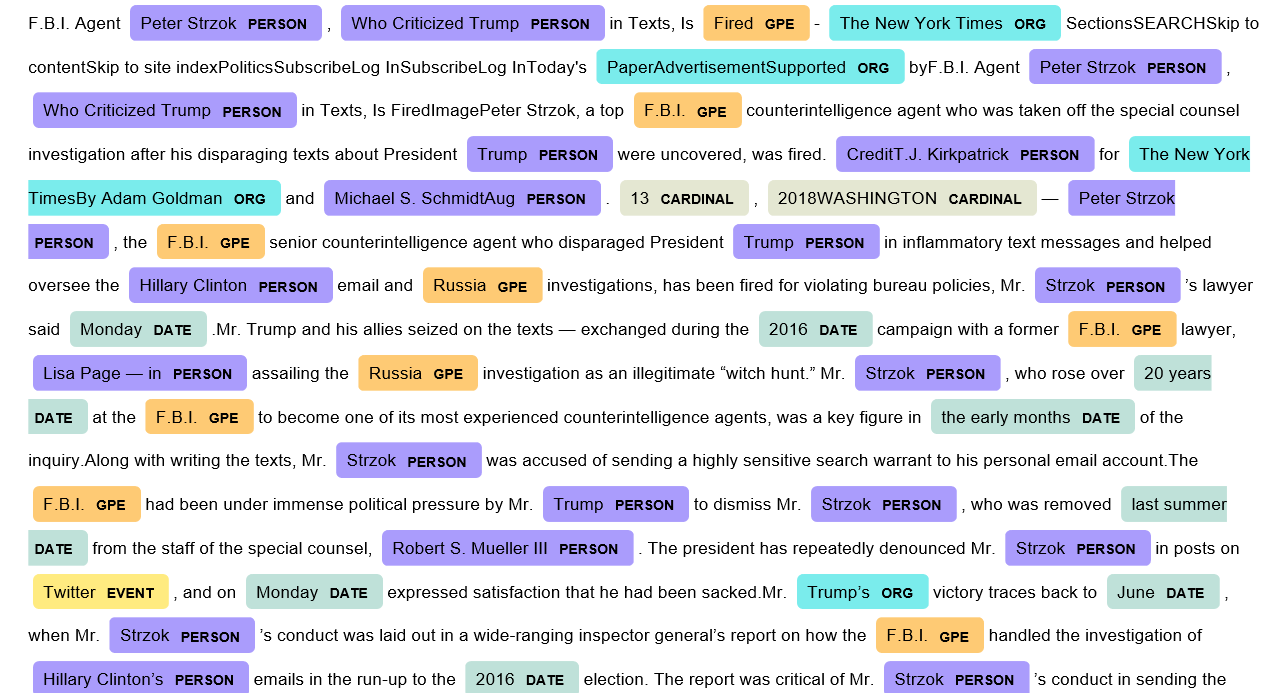

Source: https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

In [4]:
doc = nlp('The Ministry of Industry and Advanced Technology (MoIAT), UAE Space Agency, and COP28, through the Office of the UAE Special Envoy for Climate Change (OSECC)' 
          'will work together to encourage organizations in the advanced technology and space sectors to share their contributions towards climate efforts at the' 
          'Technology and Innovation Hub at COP28, which is set to be the most inclusive COP yet.'
          'The X boss said users will still be able to block people from directly messaging them, however.'

'But many people on social media said it will make it hard for people to remove abusive posts from their timeline.'

'It is the latest in a series of changes Mr Musk has made since taking over the site in a $44bn deal last year.'

'Currently, when users "block" an account, it stops that account\'s posts from appearing in the blocker\'s timeline, and vice versa.'

'An account that is blocked can no longer send messages to the blocker, nor can it view their posts.'

'Former Twitter founder, Jack Dorsey, seemed to agree with Mr Musk\'s decision, posting: \"100%. Mute only\".'

'But there are concerns that muting an account would not be sufficient protection from cases of harassment, abuse or stalking.'

'The mute function currently only stops notifications about an account\'s posts. An account that is muted can still view the muter\'s posts and reply to them.')
# print entities
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print(ents)
# now we use displaycy function on doc2
displacy.render(doc, style='ent', jupyter=True)

[('The Ministry of Industry and Advanced Technology', 0, 48, 'ORG'), ('UAE Space Agency', 58, 74, 'ORG'), ('the Office of the UAE Special Envoy for Climate Change', 95, 149, 'ORG'), ('theTechnology and Innovation Hub', 304, 336, 'ORG'), ('COP', 385, 388, 'ORG'), ('Musk', 644, 648, 'PERSON'), ('44bn', 691, 695, 'MONEY'), ('last year', 701, 710, 'DATE'), ('Twitter', 946, 953, 'PERSON'), ('Jack Dorsey', 963, 974, 'PERSON'), ('Musk', 1000, 1004, 'PERSON'), ('100%', 1027, 1031, 'PERCENT'), ('Mute', 1033, 1037, 'PERSON')]
